# Using the 20 best SA models, plot overall variability in melt data that we generated


In [1]:
from __future__ import print_function
%pylab notebook
# import datetime as dt
import glob
import matplotlib.pyplot as plt
#import matplotlib.dates as md
#from nose.tools import set_trace
import pandas as pd
import re
import seaborn as sns
import os
import sys
sns.set()
sns.axes_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0,
 'ytick.minor.size': 0}

# Make a plot of overall variability by basin and surface type

In [2]:
dir = "/Users/brodzik/projects/CHARIS/derived_hypsometries"
drainageIDs = ["IN_Hunza_at_DainyorBridge", 
               "AM_Vakhsh_at_Komsomolabad", 
               "SY_Naryn_at_NarynTown", 
               "GA_SaptaKosi_at_Chatara",
               "GA_Karnali_at_Benighat"]

alldf = pd.DataFrame([])

for drainageID in drainageIDs:
    #file = "%s/REECv0_CycleSummary/%s.annual_melt.last20.dat" % (dir, drainageID)
    #print("last20 file %s" % file, file=sys.stderr)
    file = "%s/REECv0_ModelRankSummary/%s.annual_melt.best20.dat" % (dir, drainageID)
    print("best20 file %s" % file, file=sys.stderr)
    df = pd.read_pickle(file)

    melt = df.copy()
    melt.drop(['Snow_on_land_min_ddf','Snow_on_land_max_ddf',
               'Snow_on_ice_min_ddf','Snow_on_ice_max_ddf',
               'Exposed_glacier_ice_min_ddf','Exposed_glacier_ice_max_ddf'], axis=1, inplace=True)
    # This idiotic step is necessary for seaborn to work in the plots
    melt["Snow_on_land_melt_km3"] = melt["Snow_on_land_melt_km3"].astype(float)
    melt["Snow_on_ice_melt_km3"] = melt["Snow_on_ice_melt_km3"].astype(float)
    melt["Exposed_glacier_ice_melt_km3"] = melt["Exposed_glacier_ice_melt_km3"].astype(float)

    alldf = alldf.append(melt)

best20 file /Users/brodzik/projects/CHARIS/derived_hypsometries/REECv0_ModelRankSummary/IN_Hunza_at_DainyorBridge.annual_melt.best20.dat
best20 file /Users/brodzik/projects/CHARIS/derived_hypsometries/REECv0_ModelRankSummary/AM_Vakhsh_at_Komsomolabad.annual_melt.best20.dat
best20 file /Users/brodzik/projects/CHARIS/derived_hypsometries/REECv0_ModelRankSummary/SY_Naryn_at_NarynTown.annual_melt.best20.dat
best20 file /Users/brodzik/projects/CHARIS/derived_hypsometries/REECv0_ModelRankSummary/GA_SaptaKosi_at_Chatara.annual_melt.best20.dat
best20 file /Users/brodzik/projects/CHARIS/derived_hypsometries/REECv0_ModelRankSummary/GA_Karnali_at_Benighat.annual_melt.best20.dat


In [3]:
alldf["ID"] = alldf.drainageID.str.extract(r"_(.+)_at")

/Users/brodzik/miniconda3/envs/charis/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [4]:
alldf

,year,rank,drainageID,Snow_on_land_melt_km3,Snow_on_ice_melt_km3,Exposed_glacier_ice_melt_km3,ID
0,2001,0,IN_Hunza_at_DainyorBridge,4.552566,2.977808,1.419328,Hunza
0,2002,0,IN_Hunza_at_DainyorBridge,5.207283,2.253922,2.082804,Hunza
0,2003,0,IN_Hunza_at_DainyorBridge,6.043341,2.525573,1.984779,Hunza
0,2004,0,IN_Hunza_at_DainyorBridge,6.790848,2.460722,2.475071,Hunza
0,2005,0,IN_Hunza_at_DainyorBridge,7.162904,3.125505,1.619540,Hunza
0,2006,0,IN_Hunza_at_DainyorBridge,6.058358,3.674289,2.038494,Hunza
0,2007,0,IN_Hunza_at_DainyorBridge,5.711681,2.917867,1.481380,Hunza
0,2008,0,IN_Hunza_at_DainyorBridge,5.159987,2.889923,0.972531,Hunza
0,2009,0,IN_Hunza_at_DainyorBridge,5.534702,2.311546,1.310443,Hunza
0,2010,0,IN_Hunza_at_DainyorBridge,8.283558,2.798011,2.678316,Hunza


<IPython.core.display.Javascript object>


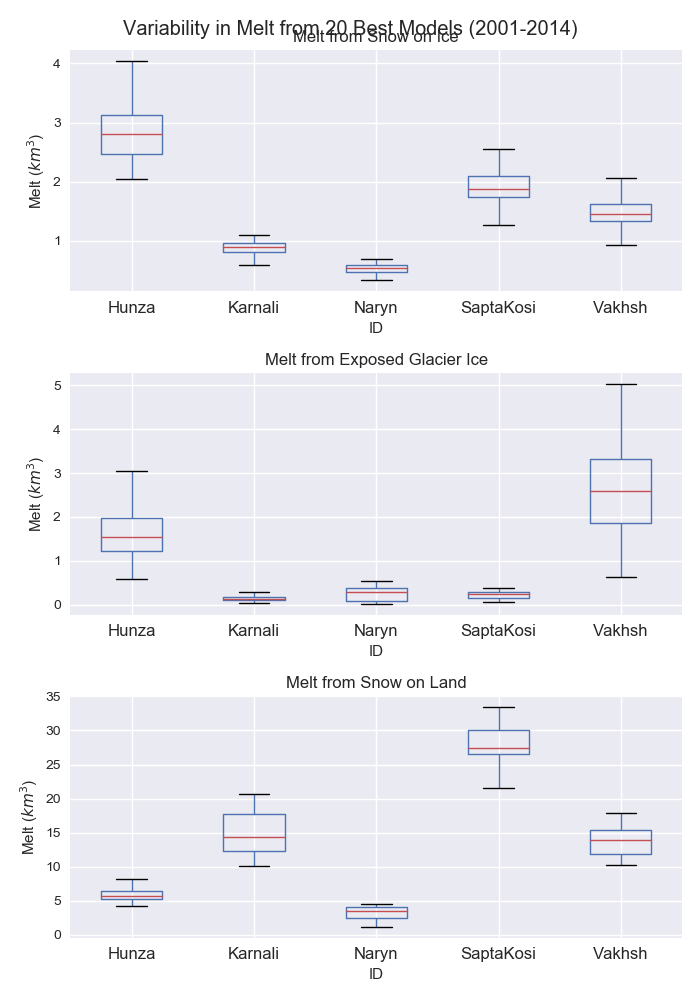

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(7,10))

alldf.boxplot(ax=axes[0],
              column='Snow_on_ice_melt_km3',
              by='ID',
              rot=0)
axes[0].set_title("Melt from Snow on Ice")

alldf.boxplot(ax=axes[1],
              column='Exposed_glacier_ice_melt_km3',
              by='ID',
              rot=0)
axes[1].set_title("Melt from Exposed Glacier Ice")

alldf.boxplot(ax=axes[2],
              column='Snow_on_land_melt_km3',
              by='ID',
              rot=0)
axes[2].set_title("Melt from Snow on Land")

for ax in axes:                  
    ax.set_ylabel('Melt ($km^3$)')

fig.suptitle("Variability in Melt from 20 Best Models (2001-2014)")

fig.tight_layout()
fig.subplots_adjust(top=0.95)


<IPython.core.display.Javascript object>


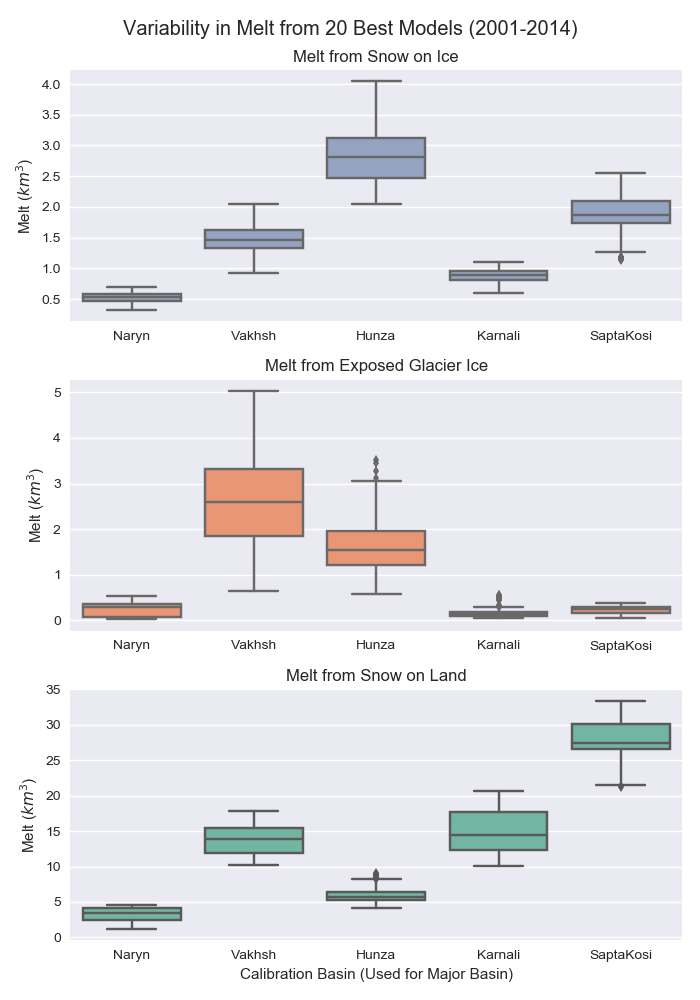

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(7,10))

soi_color = '#%02x%02x%02x' % (141, 160, 203)
egi_color = '#%02x%02x%02x' % (252, 141, 98)
sol_color = '#%02x%02x%02x' % (102, 194, 165)

order=['Naryn','Vakhsh','Hunza','Karnali','SaptaKosi']
axes[0] = sns.boxplot(ax=axes[0],
                      x='ID',
                      y='Snow_on_ice_melt_km3',
                      order=order,
                      color=soi_color,
                      data=alldf)
axes[0].set_title("Melt from Snow on Ice")
axes[0].set_xlabel("")
#axes[0].set_xticklabels([])

axes[1] = sns.boxplot(ax=axes[1],
                      x='ID',
                      y='Exposed_glacier_ice_melt_km3',
                      order=order,
                      color=egi_color,
                      data=alldf)
axes[1].set_title("Melt from Exposed Glacier Ice")
axes[1].set_xlabel("")
#axes[1].set_xticklabels([])

axes[2] = sns.boxplot(ax=axes[2],
                      x='ID',
                      y='Snow_on_land_melt_km3',
                      order=order,
                      color=sol_color,
                      data=alldf)
axes[2].set_title("Melt from Snow on Land")
#axes[2].set_xticklabels(['Naryn (SY)','Vakhsh (AM)','Hunza (IN)','Karnali (GA)','SaptaKosi (BR)'])
axes[2].set_xlabel('Calibration Basin (Used for Major Basin)')

#ymax = 1.1 * alldf[['Snow_on_land_melt_km3', 'Snow_on_ice_melt_km3', 'Exposed_glacier_ice_melt_km3']].max().max()
for ax in axes:                  
    ax.set_ylabel('Melt ($km^3$)')
#    ax.set_ylim([0., ymax])
    

fig.suptitle("Variability in Melt from 20 Best Models (2001-2014)")

fig.tight_layout()
fig.subplots_adjust(top=0.93)

# How to combine all 3 columns of data into a Single melt column with another column as label

In [7]:
test = alldf.copy()
#test.drop(['year','cycle','drainageID'],inplace=True,axis=1)
test.drop(['year','rank','drainageID'],inplace=True,axis=1)
test.set_index('ID', inplace=True)

multicol = pd.MultiIndex.from_tuples([('Melt', 'Snow on land melt'),
                                      ('Melt', 'Snow on ice melt'),
                                      ('Melt', 'Exposed glacier ice melt')])
test.columns = multicol
test = test.stack()
test = test.reset_index()
test.columns = ['ID', 'Surface', 'Melt']
test

,ID,Surface,Melt
0,Hunza,Exposed glacier ice melt,1.419328
1,Hunza,Snow on ice melt,2.977808
2,Hunza,Snow on land melt,4.552566
3,Hunza,Exposed glacier ice melt,2.082804
4,Hunza,Snow on ice melt,2.253922
5,Hunza,Snow on land melt,5.207283
6,Hunza,Exposed glacier ice melt,1.984779
7,Hunza,Snow on ice melt,2.525573
8,Hunza,Snow on land melt,6.043341
9,Hunza,Exposed glacier ice melt,2.475071


In [9]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

<IPython.core.display.Javascript object>


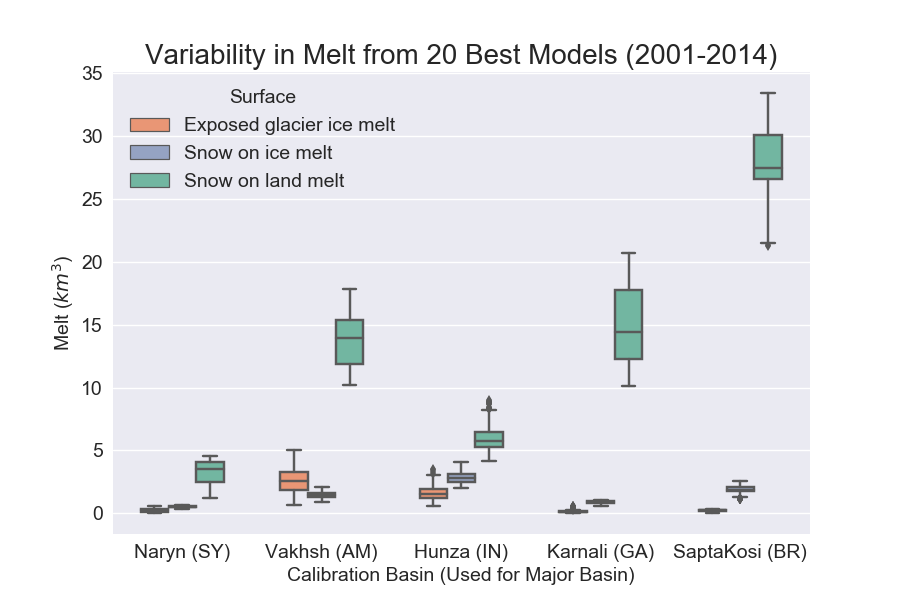

In [26]:
params = {'legend.fontsize': 14,
          'legend.handlelength': 2}
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(9,6))
my_palette = {"Snow on land melt": sol_color,
              "Exposed glacier ice melt": egi_color,
              "Snow on ice melt": soi_color}
order=['Naryn','Vakhsh','Hunza','Karnali','SaptaKosi']
sns.boxplot(ax=ax,
            x="ID",
            hue="Surface",
            y="Melt",
            order=order,
            data=test,
            palette=my_palette,
            width=0.6)
ax.set_ylabel('Melt ($km^3$)')
ax.set_title("Variability in Melt from 20 Best Models (2001-2014)")
ax.set_xticklabels(['Naryn (SY)','Vakhsh (AM)','Hunza (IN)','Karnali (GA)','SaptaKosi (BR)'])
ax.set_xlabel('Calibration Basin (Used for Major Basin)')
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
ax.title.set_fontsize(20)
lg = ax.legend(title="Surface", fontsize=14)
title = lg.get_title()
title.set_fontsize(14)

file = "%s/REECv0_ModelRankSummary/Calibration_basins.model_variability.v2.pdf" % (dir)
fig.savefig(file)